In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [46]:
# Load the datasets
file_path1 = r'C:\Users\lenovo\Desktop\p3\dataset2\CS_Sanctioned.csv'
file_path2 = r'C:\Users\lenovo\Desktop\p3\dataset2\state_wise_gov.csv'
file_path3 = r'C:\Users\lenovo\Desktop\p3\dataset2\CS_10-12-21.csv'
file_path4 = r'C:\Users\lenovo\Desktop\p3\dataset2\CS_Highway.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)
data3 = pd.read_csv(file_path3)
data4 = pd.read_csv(file_path4)

In [47]:
# Step 1: Rename columns for consistency
data1_renamed = data1.rename(columns={'State/UT-wise': 'State/UT'})
data3_renamed = data3.rename(columns={'State/ UT': 'State/UT', 'Charging Stations': 'State Charging Stations'})


In [48]:

# Remove any total row from all datasets
data1_renamed = data1_renamed[~data1_renamed['State/UT'].str.contains('Total', case=False, na=False)]
data2 = data2[~data2['State/UT'].str.contains('Total', case=False, na=False)]
data3_renamed = data3_renamed[~data3_renamed['State/UT'].str.contains('Total', case=False, na=False)]
data4 = data4[~data4['Highways/Expressways'].str.contains('Total', case=False, na=False)]

In [49]:
# Step 2: Merge the datasets
# Merge data1 and data2 on 'State/UT'
merged_data = pd.merge(data1_renamed, data2, on='State/UT', how='inner')


In [50]:
# Calculate growth metrics and infrastructure gaps
merged_data['Growth_2020_2023'] = (merged_data['2023'] - merged_data['2020']) / merged_data['2020'] * 100
merged_data['EV_Stations_per_Grand_Total'] = merged_data['Number of Electric Vehicle Charging Sanctioned'] / merged_data['Grand Total']


In [51]:
# Merge with Dataset 3 for state-level charging stations
state_level_data = pd.merge(
    merged_data, 
    data3_renamed[['State/UT', 'State Charging Stations']], 
    on='State/UT', 
    how='left'
)

In [52]:
# Step 3: Ranking and Clustering
# Rank states based on growth and gaps
state_level_data['Growth_Rank'] = state_level_data['Growth_2020_2023'].rank(ascending=False)
state_level_data['Gap_Rank'] = state_level_data['EV_Stations_per_Grand_Total'].rank()

In [53]:
# KMeans clustering for prioritization
kmeans = KMeans(n_clusters=3, random_state=42)
state_level_data['Priority_Cluster'] = kmeans.fit_predict(state_level_data[['Growth_2020_2023', 'EV_Stations_per_Grand_Total']])


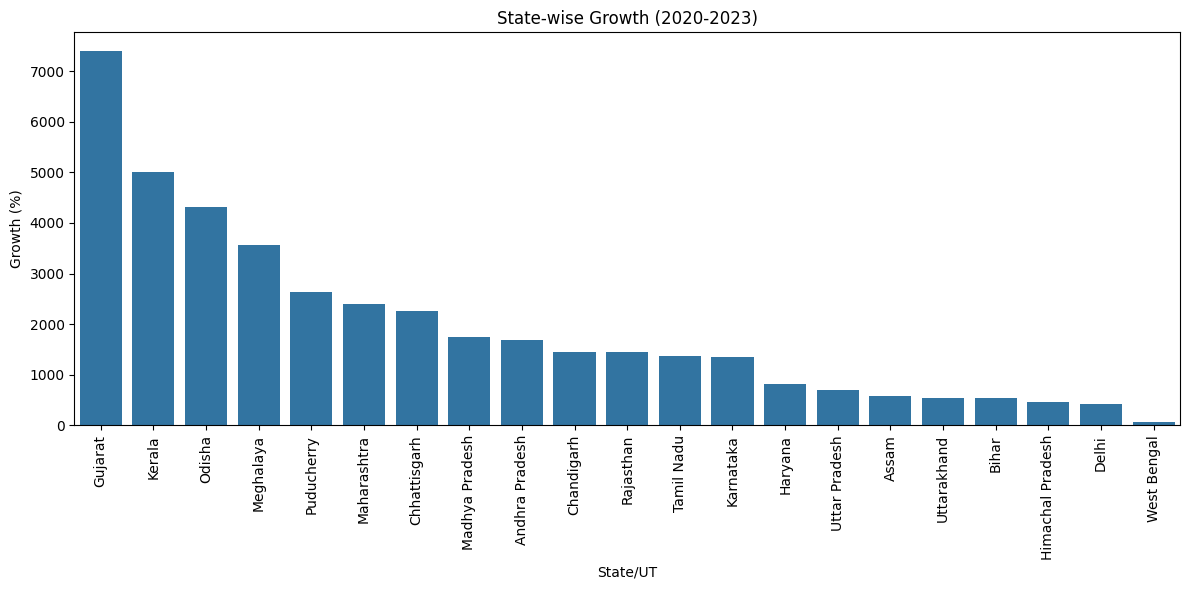

In [54]:
# Step 4: Visualization
# Growth and infrastructure gaps
plt.figure(figsize=(12, 6))
sns.barplot(x='State/UT', y='Growth_2020_2023', data=state_level_data.sort_values('Growth_2020_2023', ascending=False))
plt.xticks(rotation=90)
plt.title('State-wise Growth (2020-2023)')
plt.ylabel('Growth (%)')
plt.xlabel('State/UT')
plt.tight_layout()
plt.savefig('state_growth.png')
plt.show()

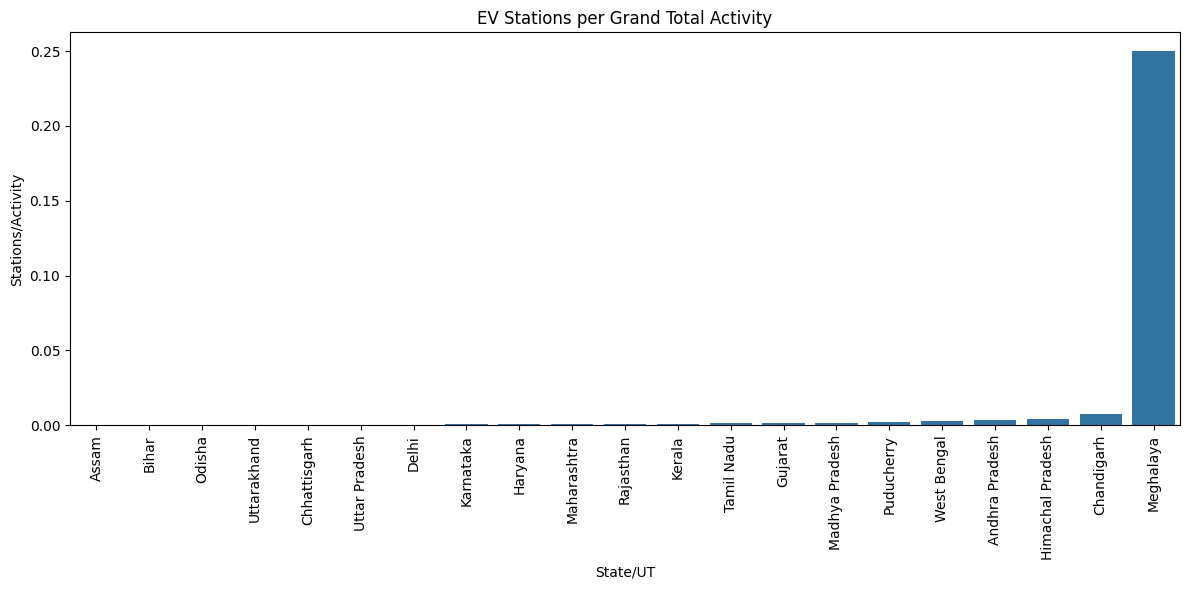

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State/UT', y='EV_Stations_per_Grand_Total', data=state_level_data.sort_values('EV_Stations_per_Grand_Total'))
plt.xticks(rotation=90)
plt.title('EV Stations per Grand Total Activity')
plt.ylabel('Stations/Activity')
plt.xlabel('State/UT')
plt.tight_layout()
plt.savefig('stations_gap.png')
plt.show()

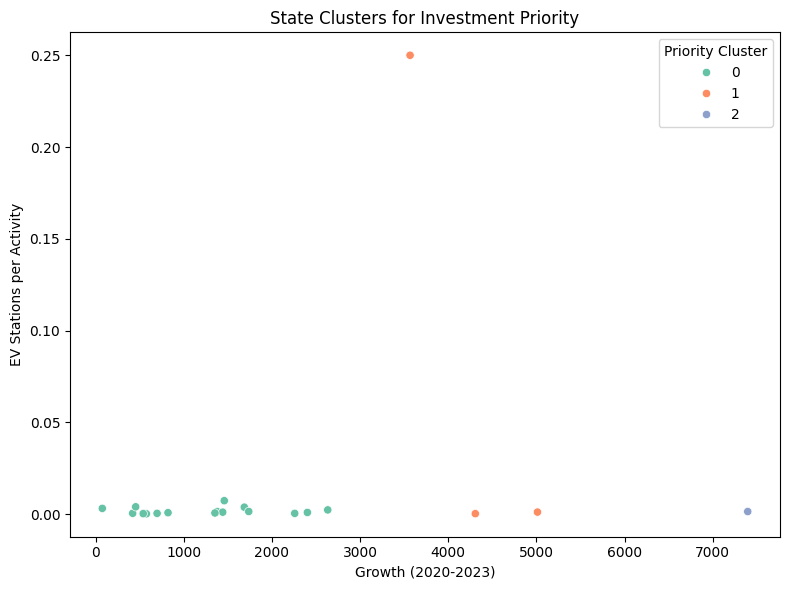

In [56]:
# Cluster visualization excluding "Total" rows
filtered_cluster_data = state_level_data[~state_level_data['State/UT'].str.contains('Total', case=False, na=False)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Growth_2020_2023', y='EV_Stations_per_Grand_Total', hue='Priority_Cluster', data=filtered_cluster_data, palette='Set2')
plt.title('State Clusters for Investment Priority')
plt.xlabel('Growth (2020-2023)')
plt.ylabel('EV Stations per Activity')
plt.legend(title='Priority Cluster')
plt.tight_layout()
plt.savefig('state_clusters.png')
plt.show()

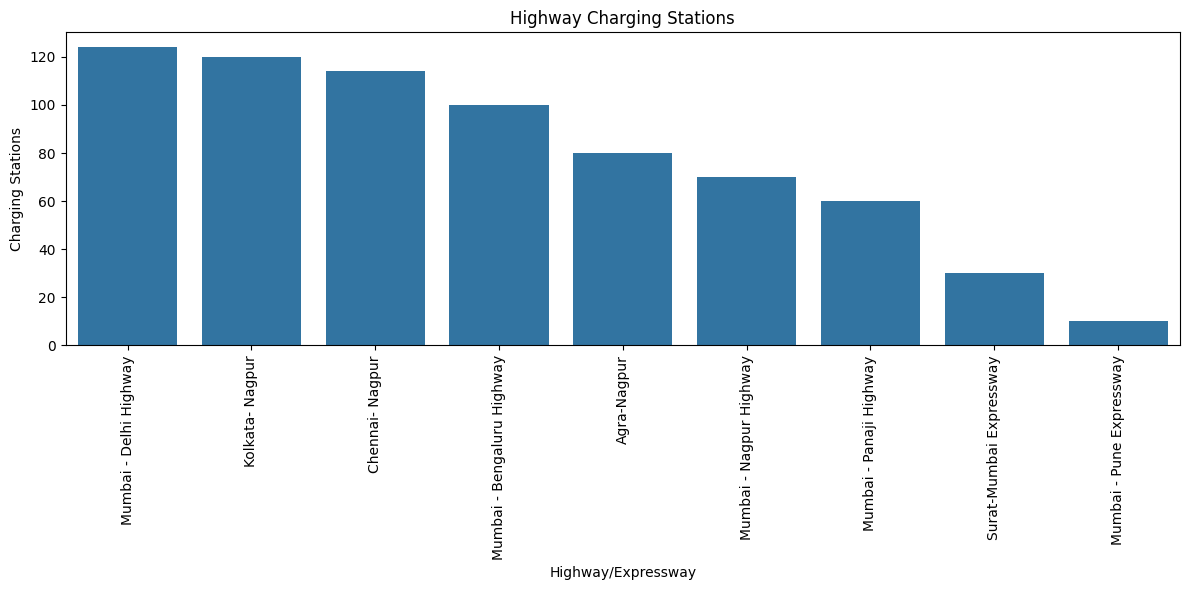

In [58]:
# Step 5: Highway Analysis excluding "Total" rows
filtered_highway_data = data4[~data4['Highways/Expressways'].str.contains('Total', case=False, na=False)]
filtered_highway_data['Highway_Rank'] = filtered_highway_data['Charging Stations'].rank(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Highways/Expressways', y='Charging Stations', data=filtered_highway_data.sort_values('Charging Stations', ascending=False))
plt.xticks(rotation=90)
plt.title('Highway Charging Stations')
plt.ylabel('Charging Stations')
plt.xlabel('Highway/Expressway')
plt.tight_layout()
plt.savefig('highway_stations.png')
plt.show()

In [59]:
conclusion = """
Market Segmentation and Investment Priority Summary:
1. State-level analysis identified regions with high growth potential and significant infrastructure gaps.
   - Growth rates and EV station density were used to rank states.
   - KMeans clustering categorized states into three priority groups for investment.
2. Highway analysis highlighted key expressways requiring improved EV charging infrastructure.
3. Visualizations and ranked data provide actionable insights for strategic planning.
   - Bar charts for growth and gaps.
   - Scatter plot for investment priority clustering.
   - Highway analysis for targeted infrastructure upgrades.
4. Processed data and visual outputs have been saved for reporting and further analysis.

Recommendations:
- Focus investments on high-priority clusters and underserved highways.
- Leverage growth metrics to anticipate future infrastructure demands.
"""
print(conclusion)


Market Segmentation and Investment Priority Summary:
1. State-level analysis identified regions with high growth potential and significant infrastructure gaps.
   - Growth rates and EV station density were used to rank states.
   - KMeans clustering categorized states into three priority groups for investment.
2. Highway analysis highlighted key expressways requiring improved EV charging infrastructure.
3. Visualizations and ranked data provide actionable insights for strategic planning.
   - Bar charts for growth and gaps.
   - Scatter plot for investment priority clustering.
   - Highway analysis for targeted infrastructure upgrades.
4. Processed data and visual outputs have been saved for reporting and further analysis.

Recommendations:
- Focus investments on high-priority clusters and underserved highways.
- Leverage growth metrics to anticipate future infrastructure demands.

